# Ev.4:- Global Power Plant Database Project

In [1]:
#Libraries to be used for model building

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv file
data=pd.read_csv("database_IND.csv")

In [3]:
# .head used for fetching first five rows 
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In this, as seen above there are lot of NaN values which seems that data requires cleaning for proceeding towards model building.

# EDA (EXPLORATORY DATA ANALYSIS PHASE)

In [4]:
# For checking how many rows and columns are there in dataset.
data.shape

(907, 27)

In this, the observation is that there are 907 rows and 27 columns in the dataset.

In [5]:
# For checking the number of unique values 
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In this, it is seen that Column name and gppd_idnr column has all the unique values in all rows and it is not required for predictions ,so it needs to be dropped.

column country is having IND in all the rows  and this also is not required for project analysis,so it needs to be dropped.

In [6]:
# For checking the Null/NAN values in the dataset

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
# For checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In this, there are lots of null values present in the dataset
There are 4 columns which is having null values,it requires to be removed. Following columns are Other_fuel3, wepp_id, Estimated_generation_gwh and other_fuel2. So, these columns are of no use for proceeding further and it can be dropped, although there are two columns with same type of information, the columns are country and country_long. both are providing same details, so one of them can be removed for efficiency ahead. Here,column:- country_long will be deleted from the data

In [8]:
# For deleting the not required columns:-
data.drop(["country_long","other_fuel2", "other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [9]:
# For checking whether data has been deleted or not.
data.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,...,WRI,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,...,WRI,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


As seen above, the columns has been deleted.

In [10]:
# For Checking unique values present in individual columns
data["generation_data_source"].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [11]:
# For Checking unique values present in individual columns.
data["other_fuel1"].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In this, it is observed that column generation_data_source is giving same information that is already present with us in source column. However, source column contains values in all the rows that means there are no null or NaN values present in source column and generation_data_source column which has 458 rows with null values, so it is required to drop generation_data_source column. 

Also, it is also seen that there is a column name url, which is very usefull, but since we are using this data for our analysis purpose only , so we can consider dropping it as it is not playing any much significance in the dataset.

In [12]:
# For dropping the not required columns which is not required for efficiency.
data.drop(["country","name","gppd_idnr","owner","url","generation_data_source","year_of_capacity_data"], axis=1, inplace=True)

In [13]:
# For checking that the columns has been removed or not
data.head(n=6)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN
5,250.0,23.7689,68.6447,Coal,Oil,2005.0,Central Electricity Authority,WRI,NaN,1153.421000,1208.852,1175.765000,1147.913000,976.655000,NaN


As seen above, the columns has been deleted.

In [14]:
# For checking datatype of all columns
data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
generation_gwh_2019    float64
dtype: object

In this,the Target variable primary fuel has object datatype and the next target variable capacity_mw is having float datatype.

In [15]:
# For checking the Skewness levels:-
data.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

In this, all the columns has skewness except latitude. So, it needs to be removed.

In [16]:
# For checking the statistical summary of the dataset.
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In this, there is a diff between Mean and Median. and also there is a difference between 75%  and the Max value which confirms that the outliers are present in the dataset and there are few outliers also in logitude column.

In [17]:
# For Replacing NaN Values in numerical columns in the dataset.

data["latitude"]=data["latitude"].fillna(data["latitude"].mean())
data["longitude"]=data["longitude"].fillna(data["longitude"].mean())
data["commissioning_year"]=data["commissioning_year"].fillna(data["commissioning_year"].mean())
data["generation_gwh_2013"]=data["generation_gwh_2013"].fillna(data["generation_gwh_2013"].mean())
data["generation_gwh_2014"]=data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].mean())
data["generation_gwh_2015"]=data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].mean())
data["generation_gwh_2016"]=data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].mean())
data["generation_gwh_2017"]=data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].mean())
data["generation_gwh_2018"]=data["generation_gwh_2018"].fillna(data["generation_gwh_2018"].mean())
data["generation_gwh_2019"]=data["generation_gwh_2019"].fillna(data["generation_gwh_2019"].mean())

In [18]:
# For converting the Null values of categorical columns

data["other_fuel1"]=data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["geolocation_source"]=data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [19]:
# For Checking that the values have been removed or not
data.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

In [20]:
# For deleting the empty and duplicate data columns which is not required for us to proceed further.
data.drop(["generation_gwh_2013","generation_gwh_2019"],axis=1,inplace=True)

In [21]:
data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now, as seen above there are no Null Values present in the dataset.

In [22]:
# For checking the unique values in the target column
data["capacity_mw"].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [23]:
# For checking the unique values in the Target column
data["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [24]:
# For dividing and assigning variables to categorical column and integer columns.
Categorical=[]
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Categorical.append(i)
    if data.dtypes[i]!="object":
        Integer.append(i)
print(Categorical)
print(Integer)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


Here, the values has been assigned properly.

# Performing Univariate Analysis:-

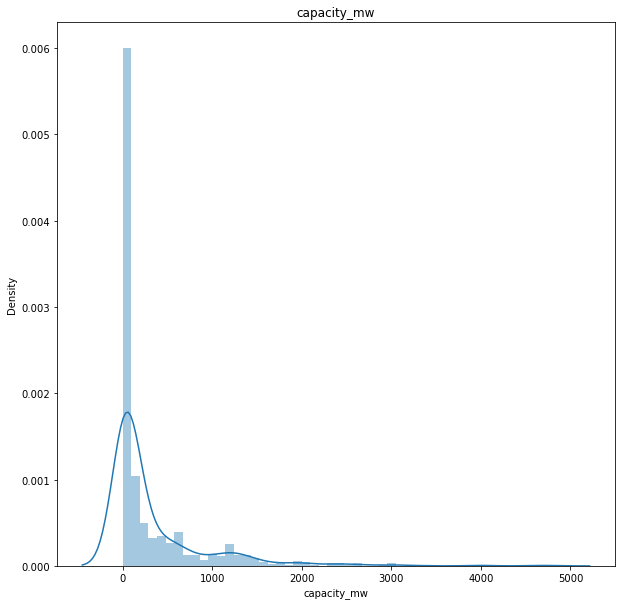

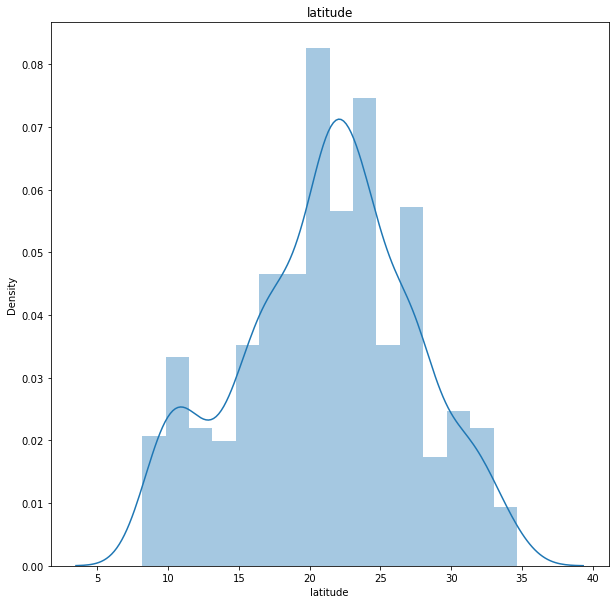

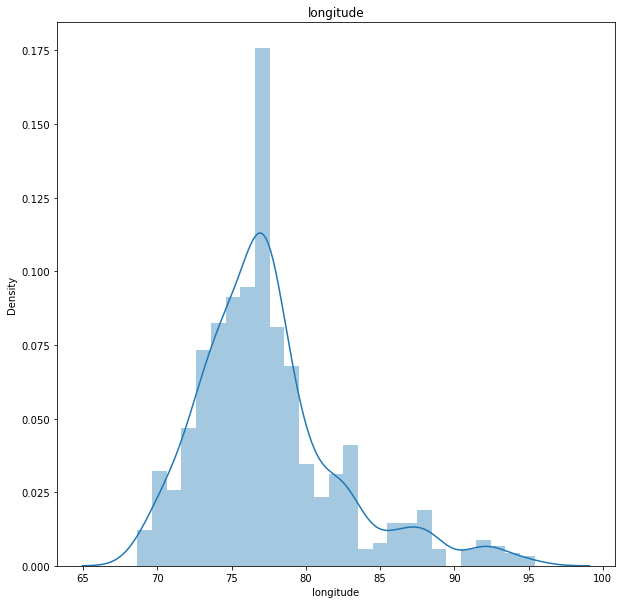

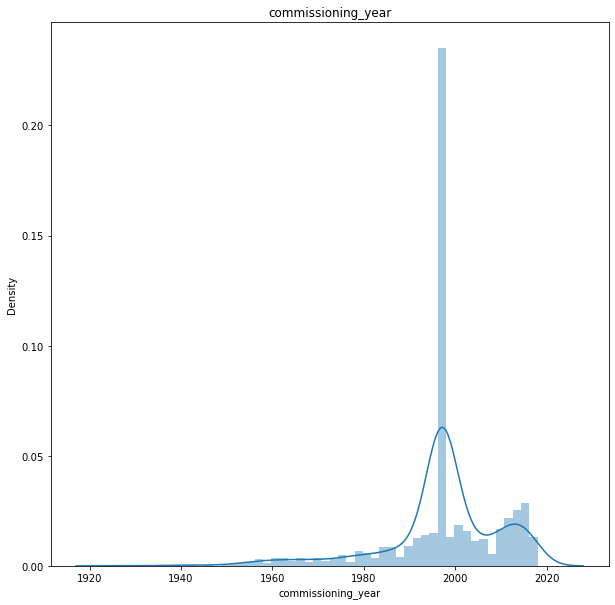

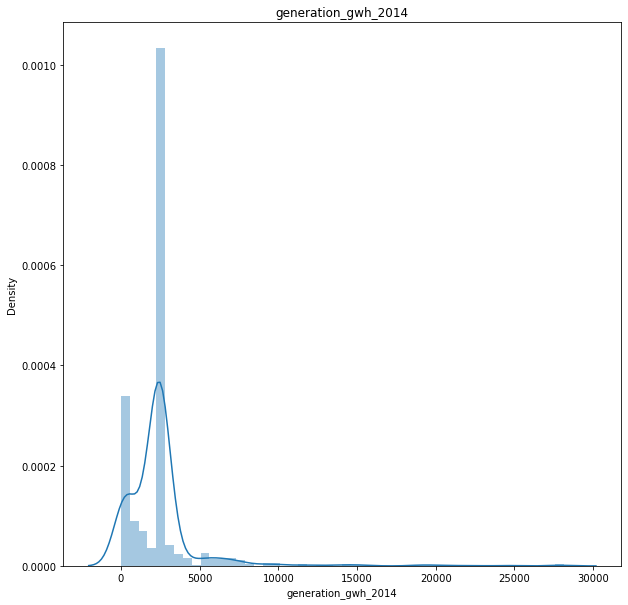

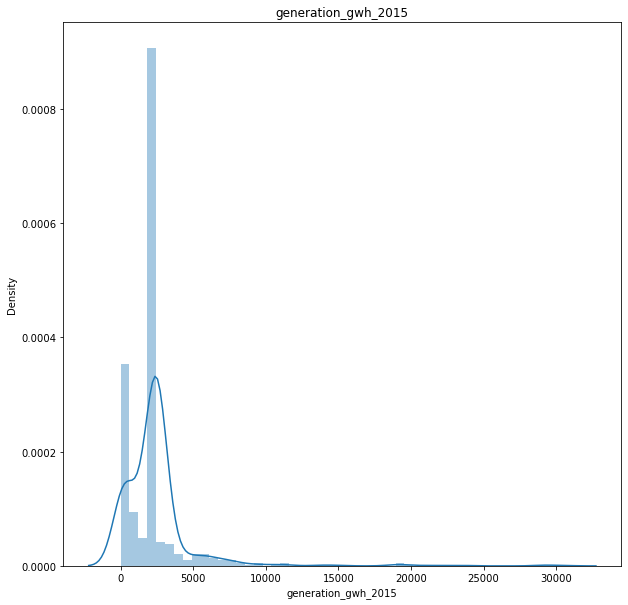

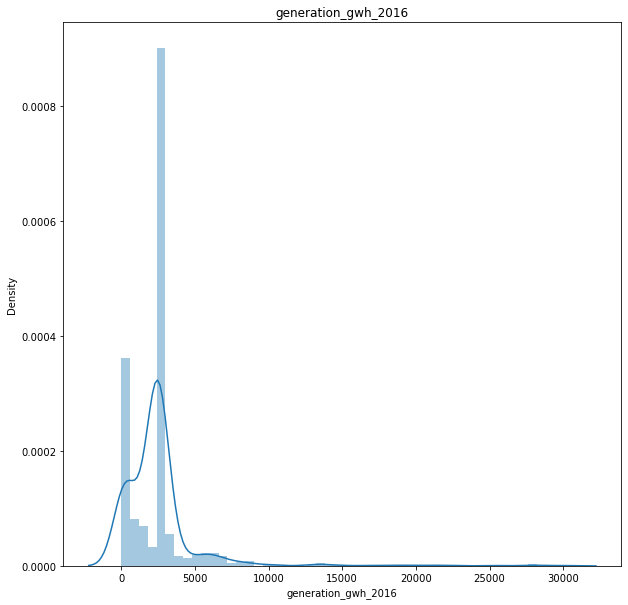

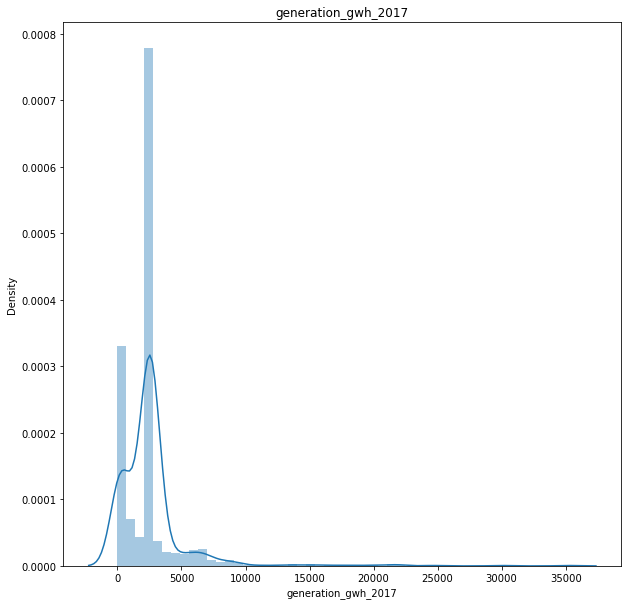

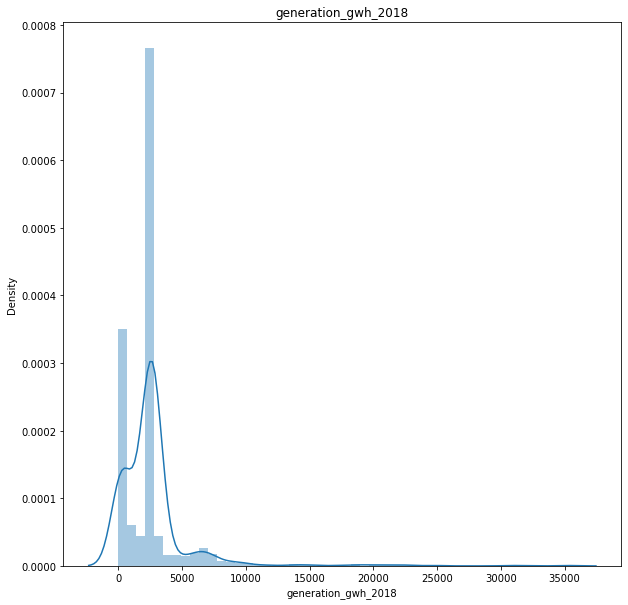

In [25]:
# For visualizing all the numerical columns using  plotting method:-distplot
for i in data[Integer]:
    plt.figure(figsize=(10,10))
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

In [26]:
# For checking the types of fuel with value_count in primary_fuel column:-
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

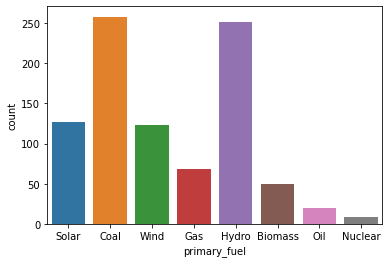

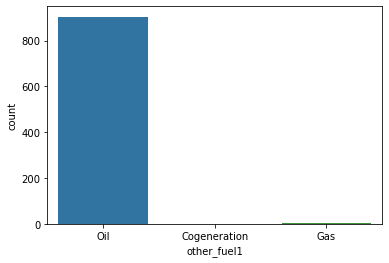

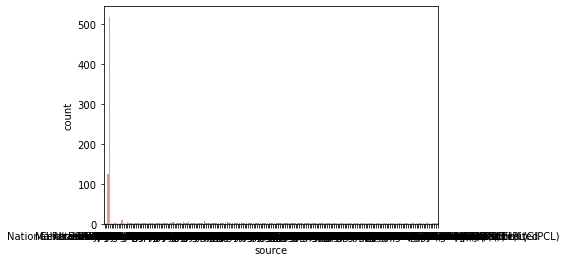

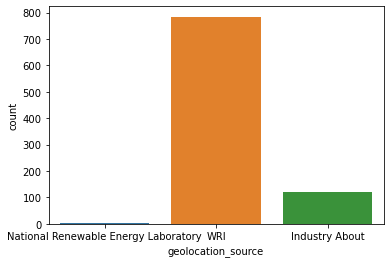

In [27]:
# For visualising the categorical columns using plotting method: count plot
for i in data[Categorical]:
    sns.countplot(data[i])
    plt.show()

In this, it is seen that Mostly Coal and Hydro based power plant are used, then Solar Based , Wind based, gas based, biomass based, oil based and the last is Nuclear based Power Plants.
It is seen that most of the plants are using oil as there secondary fuel option.
Geolocation_source of maximum plots is WRI in this.

# Bivariate Analysis:-

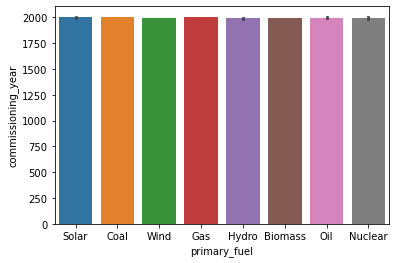

In [28]:
# For finding the comparison between features and  finding out correlation between them:-
sns.barplot(x="primary_fuel", y="commissioning_year", data=data)
plt.show()

In this, for better clarity and visualisation changing name of commissioning year column

In [29]:
# For changing column commissioning_year to some more informative column for better clarity:-

data["since_years"]=2018-data["commissioning_year"]

In [30]:
# For dropping the column commissioning_year from the dataset:
data.drop(["commissioning_year"], axis=1, inplace=True )
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000


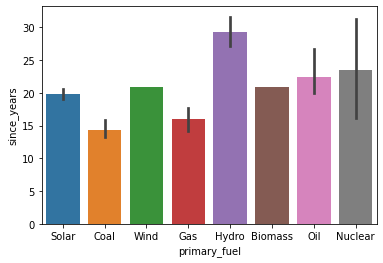

In [31]:
# For checking the correlation  between primary_fuel and since_years column.
sns.barplot(x="primary_fuel", y="since_years", data=data)
plt.show()

In this,the older plants were based mostly on coal and gas, whereas new plants are  based on hydro, solar, nuclear, wind and oil.

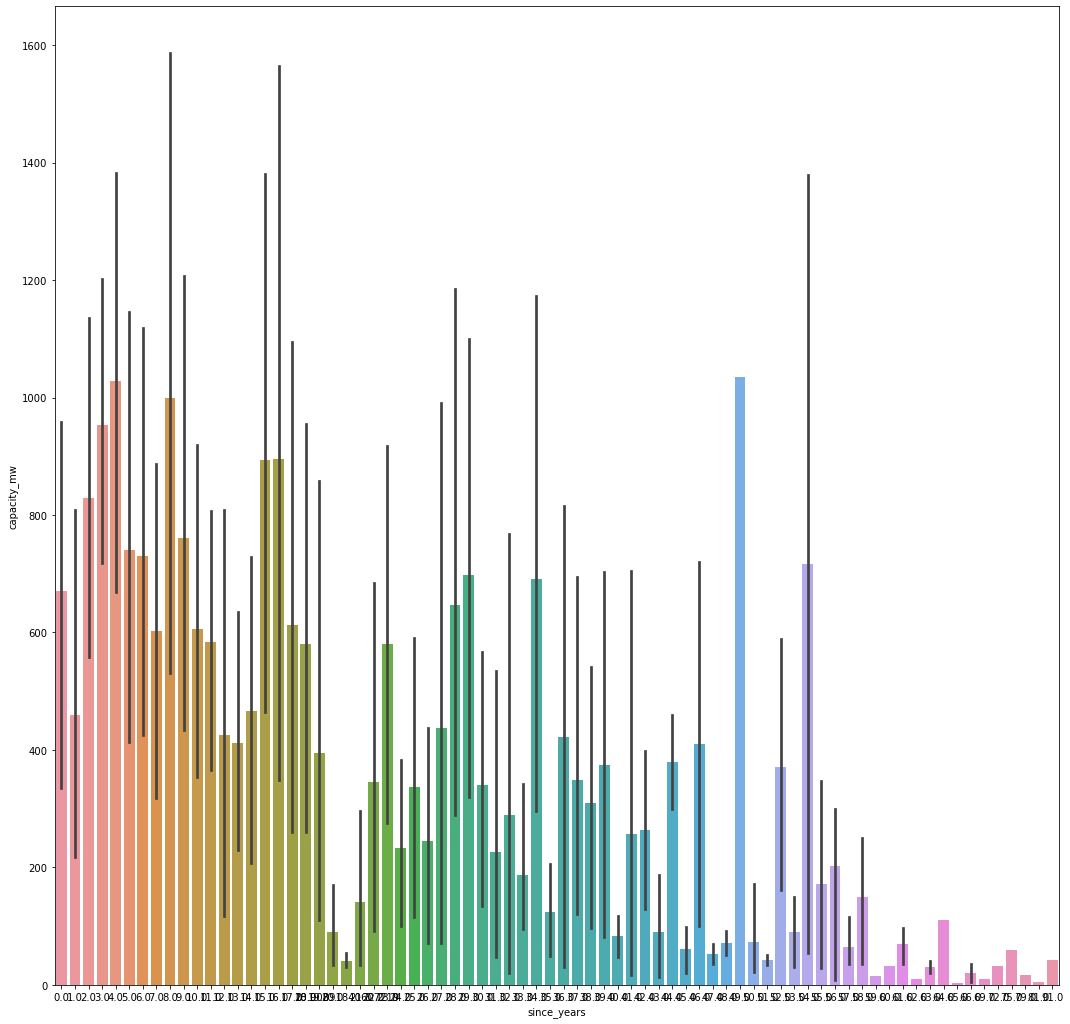

In [32]:
# For comparing since_years to capacity_mw (Target Column) to see correlation between these 2 columns:
plt.figure(figsize=(18,18))
sns.barplot(x="since_years", y="capacity_mw", data=data)
plt.show()

In this,it is seen that Power plants are installed in recent years.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2015'>

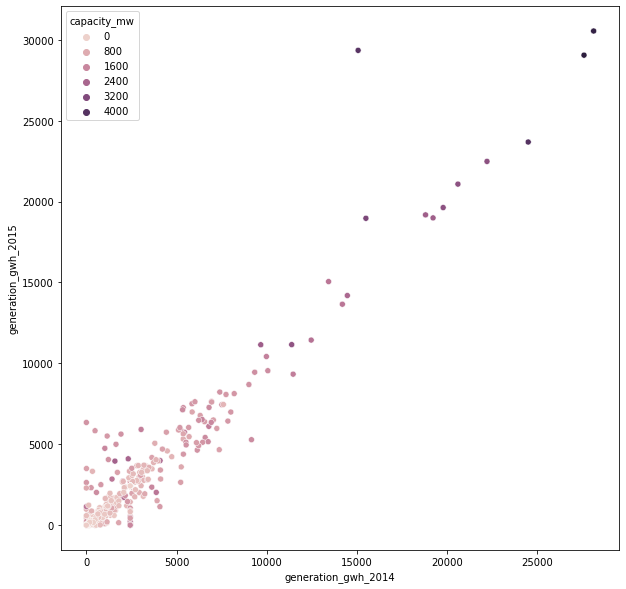

In [33]:
# For comparing generation_gwh_2014 and generation_gwh_2015:-
plt.figure(figsize=(10,10))
sns.scatterplot(data["generation_gwh_2014"],data["generation_gwh_2015"],hue=data["capacity_mw"])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='generation_gwh_2016'>

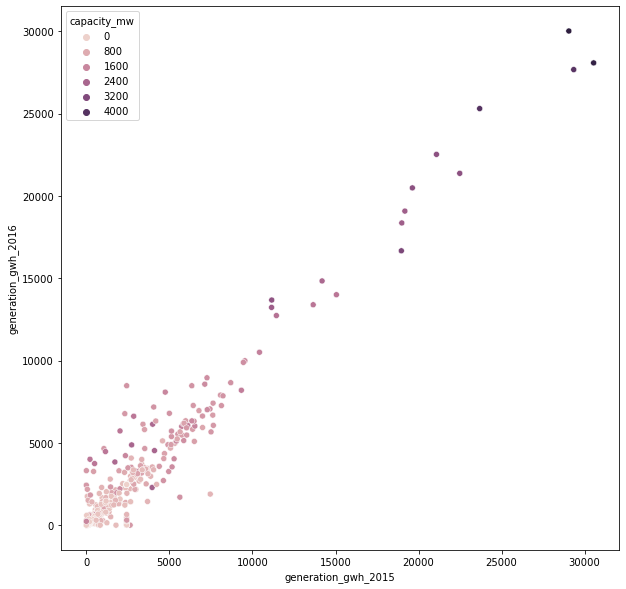

In [34]:
# For comparing generation_gwh_2015, generation_gwh_2016:-
plt.figure(figsize=(10,10))
sns.scatterplot(data["generation_gwh_2015"],data["generation_gwh_2016"],hue=data["capacity_mw"])

In this, it is seen that more power plants with capacity from 5000 to 10000 mw has been set up during these years.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2017'>

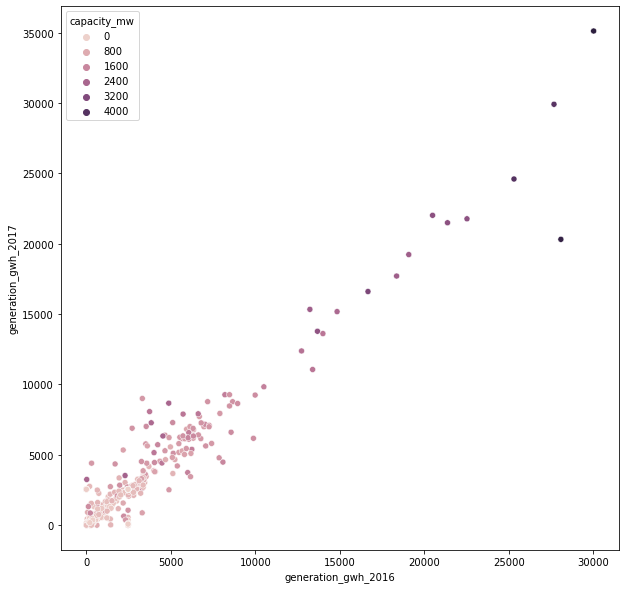

In [35]:
# For comparing generation_gwh_2016 and generation_gwh_2017
plt.figure(figsize=(10,10))
sns.scatterplot(data["generation_gwh_2016"],data["generation_gwh_2017"],hue=data["capacity_mw"])

In this, it is seen  increase in no. of small capacity project upto 10000 and also bigger projects in the year 2016 and 2017.

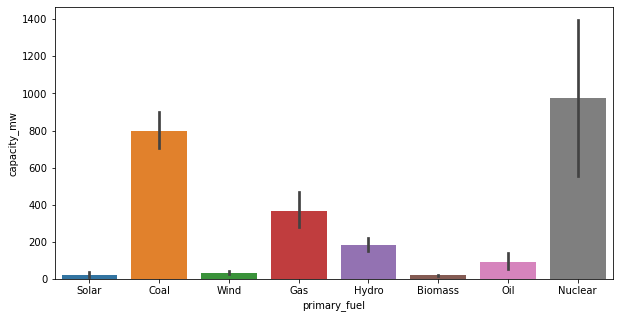

In [36]:
# For checking distribution among various sources:-
plt.figure(figsize=(10,5))
sns.barplot(x="primary_fuel",y="capacity_mw",data=data)
plt.show()

In this, plants with more capacity_mw uses Nuclear and Coal mostly, but solar is used very less.

# Multi Variate Analysis:-

In [37]:
# For Checking correlation between all columns using df.corr() meth
corr= data.corr()

In [38]:
corr

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
capacity_mw,1.000000,0.050984,0.195882,0.694350,0.711190,0.742221,0.757585,0.773456,-0.274292
latitude,0.050984,1.000000,0.036362,0.044321,0.036398,0.031256,0.031212,0.031326,-0.102069
longitude,0.195882,0.036362,1.000000,0.011472,0.018818,0.039209,0.039675,0.037780,-0.092331
generation_gwh_2014,0.694350,0.044321,0.011472,1.000000,0.953594,0.925874,0.891687,0.884956,-0.133051
generation_gwh_2015,0.711190,0.036398,0.018818,0.953594,1.000000,0.968888,0.928242,0.923461,-0.147338
generation_gwh_2016,0.742221,0.031256,0.039209,0.925874,0.968888,1.000000,0.964649,0.957159,-0.170644
generation_gwh_2017,0.757585,0.031212,0.039675,0.891687,0.928242,0.964649,1.000000,0.982689,-0.170863
generation_gwh_2018,0.773456,0.031326,0.037780,0.884956,0.923461,0.957159,0.982689,1.000000,-0.174377
since_years,-0.274292,-0.102069,-0.092331,-0.133051,-0.147338,-0.170644,-0.170863,-0.174377,1.000000


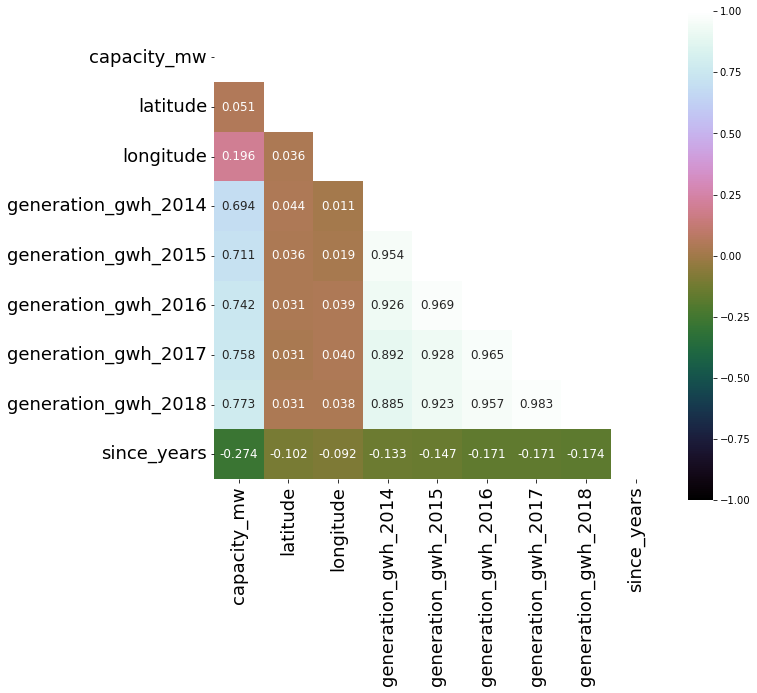

In [39]:
# For visualising correlation using heatmap method:-
uppertriangle=np.triu(data.corr())
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True, square=True, fmt="0.3f", annot_kws={'size':12}, cmap="cubehelix",mask=uppertriangle)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

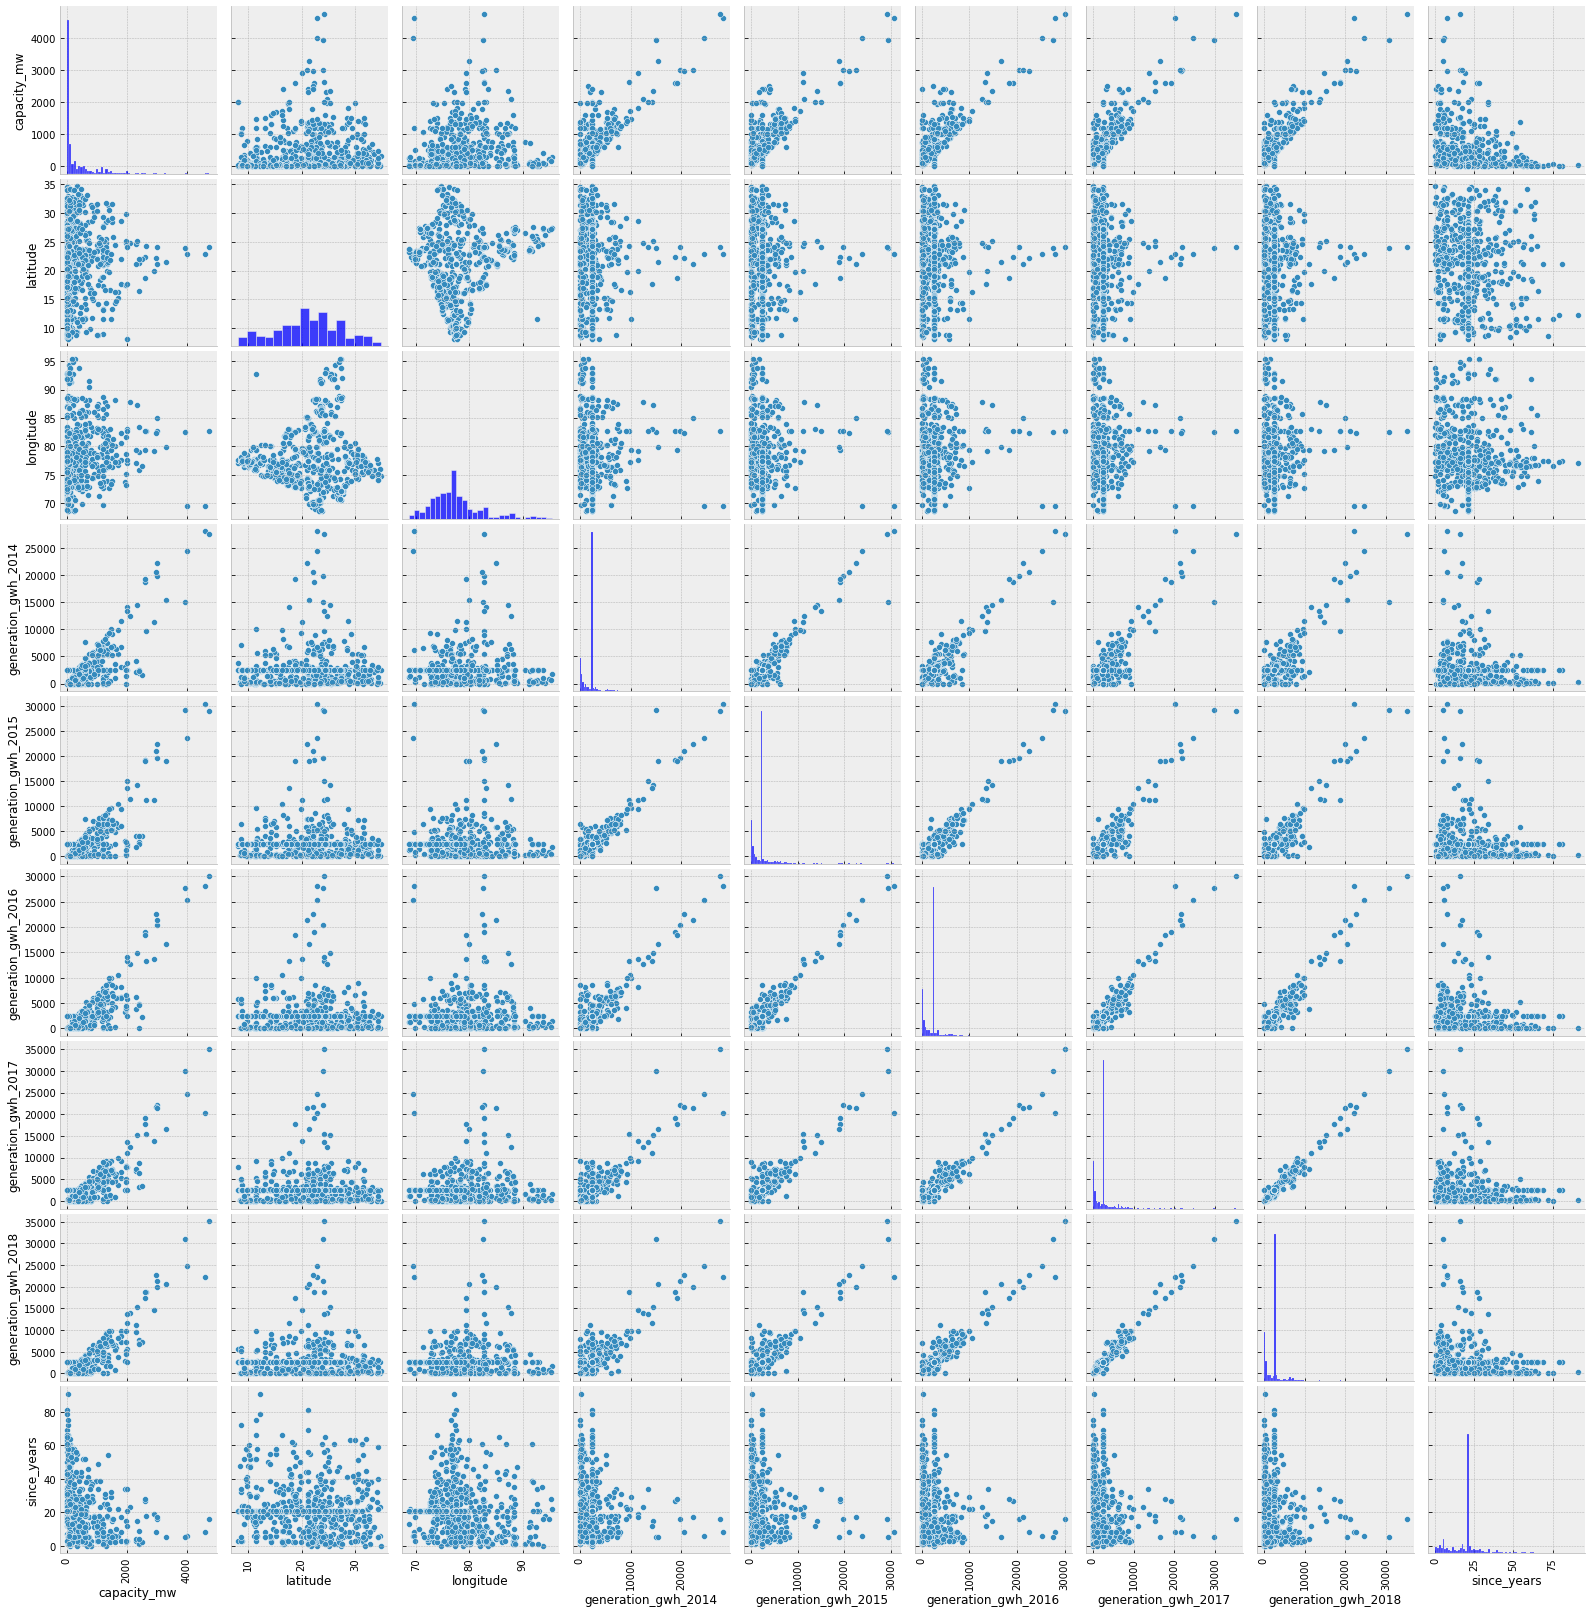

In [40]:
# For Checking correlation of capacity_mw with all the columns and observing the trend.
plt.style.use('bmh')
N = sns.pairplot(data)
for ax in N.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

# ENCODING TECHNIQUES:-

In [41]:
# Using Label Encoder method converting categorical data:-
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
Le=LabelEncoder()
data["primary_fuel"]=Le.fit_transform(data["primary_fuel"])
data["other_fuel1"]=Le.fit_transform(data["other_fuel1"])

In [42]:
# For checking that data has been encoded or not:-
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
0,2.5,28.1839,73.2407,6,2,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,Central Electricity Authority,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,Karnataka Power Corporation Limited,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,Hindustan Zinc ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


ORDINAL ENCODING:-

In [43]:
# For importing required libraries:-

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
data["geolocation_source"]= OE.fit_transform(data["geolocation_source"].values.reshape(-1,1))
data["source"]=OE.fit_transform(data["source"].values.reshape(-1,1))

In [44]:
## For checking that data has been encoded or not:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
0,2.5,28.1839,73.2407,6,2,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


In this, using label encoder and ordinal encoder all the values hs been transformed into numerical data type.

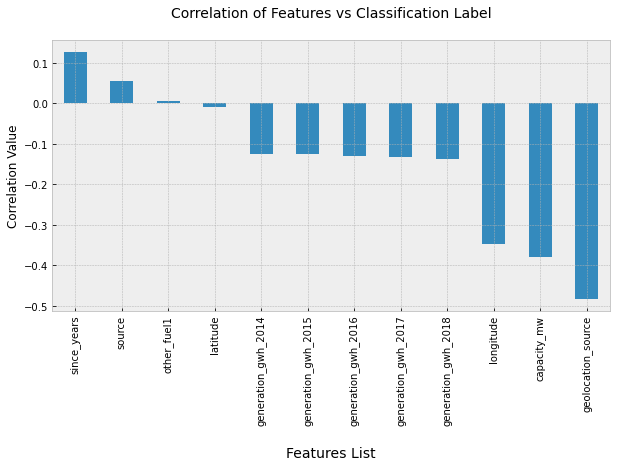

In [45]:
# For checking correlation among target and features:-
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=14)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

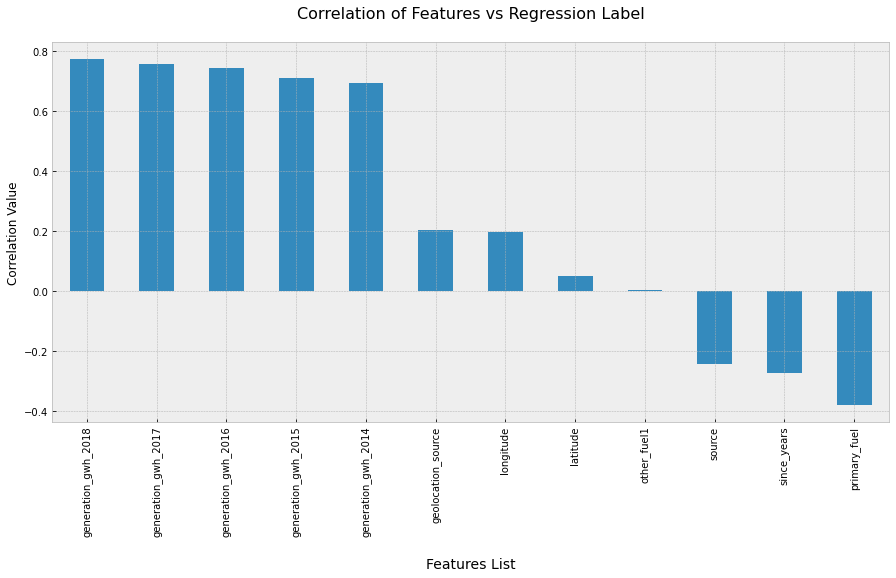

In [46]:
# For checking correlation among the second Target column and features:-
data_corr = data.corr()
plt.figure(figsize=(15,7))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [47]:
# For dividing categorical data and numerical data into respective datatypes:-
Categorical=[]
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Categorical.append(i)
    if data.dtypes[i]!="object":
        Integer.append(i)
print(Categorical)
print(Integer)

[]
['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'since_years']


# Removal of Outliers:-

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 1440x1080 with 0 Axes>

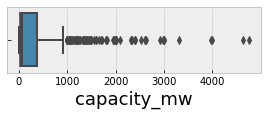

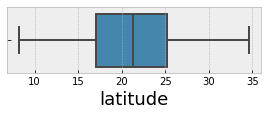

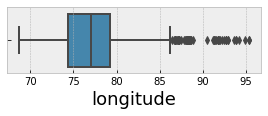

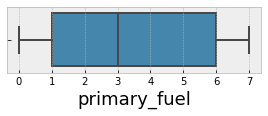

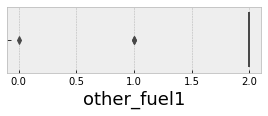

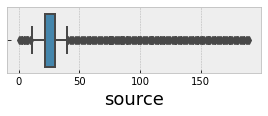

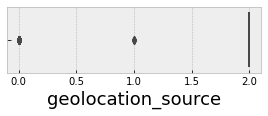

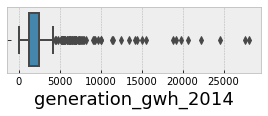

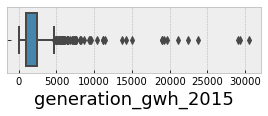

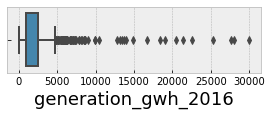

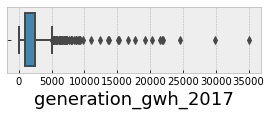

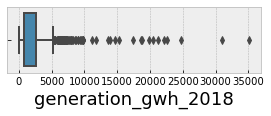

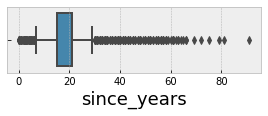

In [48]:
# For Checking  outliers in the dataset using boxplot method:-
plt.figure(figsize=(20,15))
plot=1
for column in Integer:
    if plot<=13:
        plt.figure(figsize=(10,10))
        ax=plt.subplot(7,2,plot)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=18)
    plot+=1
plt.tight_layout

There are lot of columns which is having outliers except latitude.

In [49]:
# For the columns which are having outliers:-
columns=data[["longitude","other_fuel1","source",
              "geolocation_source","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","since_years"]]

In [50]:
# For removal of outliers using ZScore methiod:-
# For Importing required libraries:- 

from scipy.stats import zscore
z=np.abs(zscore(columns))
data1=data[(z<3).all(axis=1)]
data1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
0,2.5,28.1839,73.2407,6,2,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,7.000000
1,98.0,24.7663,74.6090,1,2,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
2,39.2,21.9038,69.3732,7,2,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
3,135.0,23.8712,91.3602,2,2,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,14.000000
4,1800.0,21.9603,82.4091,1,2,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000,2.000000
903,3.0,12.8932,78.1654,6,2,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
904,25.5,15.2758,75.5811,7,2,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918
905,80.0,24.3500,73.7477,1,2,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,20.908918


As per the above cell, the outliers has been removed properly.

In [51]:
# For checking the data loss:-
Loss=(((data.shape[0]-data1.shape[0])/data.shape[0])*100)
Loss

7.717750826901875

In [52]:
# For checking the shape of new dataset:-
data1.shape

(837, 13)

In the new dataset, there are 837 rows and 13 columns.

In [53]:
# For checking the skewness levels:-
data1.skew()

capacity_mw            2.133779
latitude              -0.117126
longitude              0.902882
primary_fuel           0.426398
other_fuel1            0.000000
source                 1.790332
geolocation_source    -2.110249
generation_gwh_2014    1.523863
generation_gwh_2015    1.377604
generation_gwh_2016    1.389985
generation_gwh_2017    1.290983
generation_gwh_2018    1.419144
since_years            0.828335
dtype: float64

In this, skewness is present in almost all columns except some columns which are as per limitation parameters.

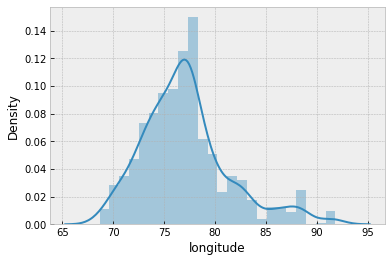

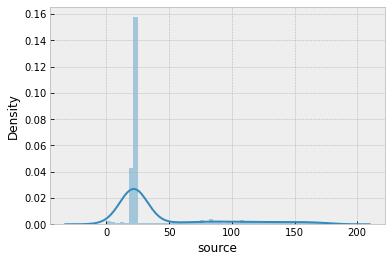

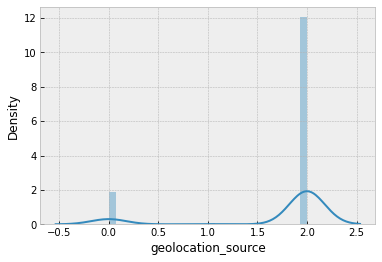

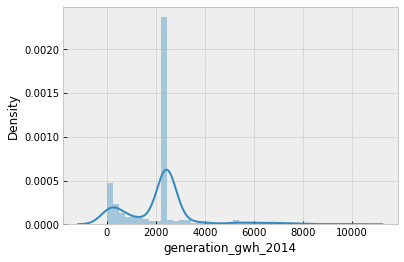

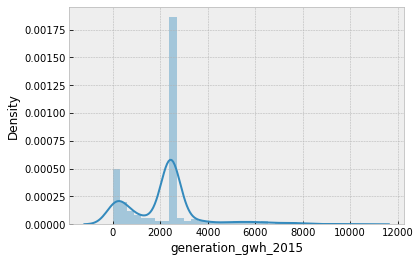

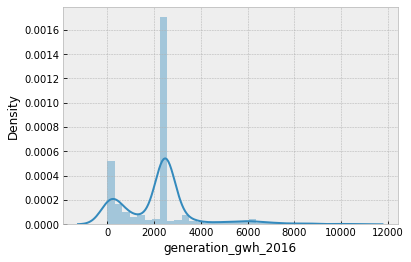

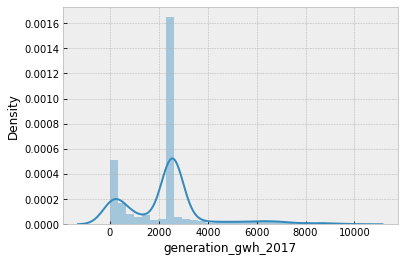

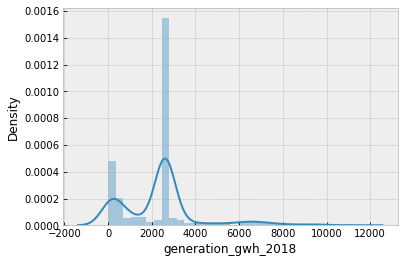

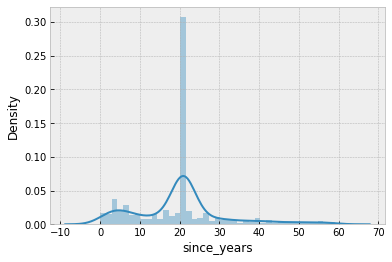

In [54]:
# For visualizing the skewness present in new dataset:-
A=["longitude","source","geolocation_source","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","since_years"]
for i in A:
    sns.distplot(data1[i])
    plt.show()

In [55]:
# For removing skewness using yeo-johnson method:-
A=["capacity_mw","longitude","source","geolocation_source","generation_gwh_2014",
   "generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","since_years"]

In [56]:
# For importing neccessary libraries for skewness:-

from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
'''
parameters:
method="box_cox" or "yeo-johnson"
'''

'\nparameters:\nmethod="box_cox" or "yeo-johnson"\n'

In [57]:
data1[A]=scaler.fit_transform(data1[A].values)

In [58]:
# For checking whether skewness has been removed or not:-
data1[A].skew()

capacity_mw            0.013907
longitude             -0.001146
source                -0.181446
geolocation_source    -2.082067
generation_gwh_2014   -0.241295
generation_gwh_2015   -0.304981
generation_gwh_2016   -0.304507
generation_gwh_2017   -0.329395
generation_gwh_2018   -0.321803
since_years           -0.004160
dtype: float64

Here, as seen above the skewness is normalised.

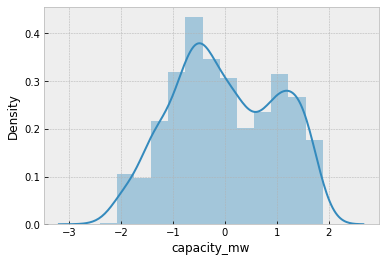

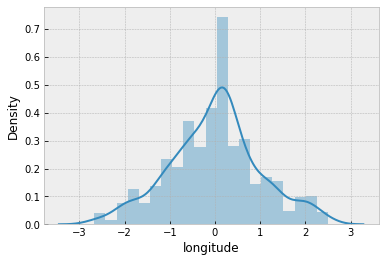

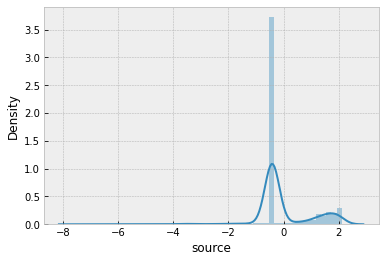

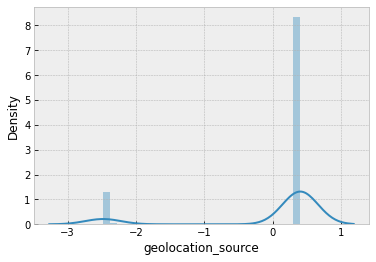

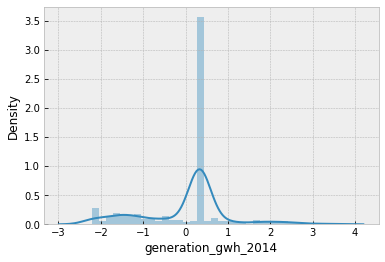

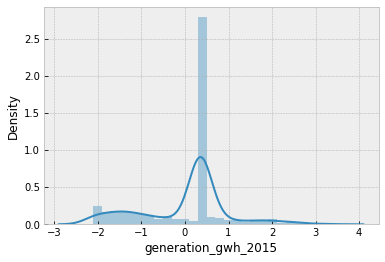

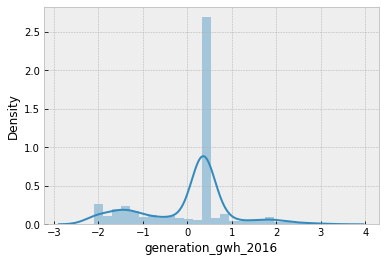

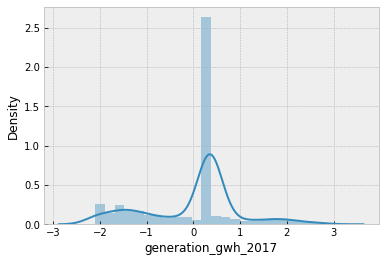

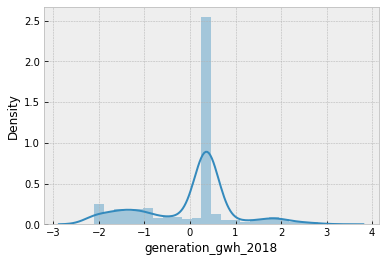

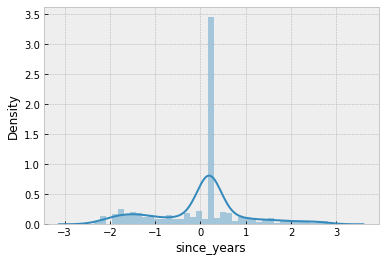

In [59]:
# For again visualizing skewness whether it is removed or not :-
for i in A:
    sns.distplot(data1[i])
    plt.show()

# Model Building 1 :- primary_fuel using classification algorithms

In [60]:
# For assigning values to x and y for prediction ahead
x=data1.drop("primary_fuel",axis=1)
y=data1["primary_fuel"]

In [63]:
#  For importing libraries and for scaling data with StandatrdScaler method:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Using SMOTE for balanacing dataset:-

In [64]:
# For balancing data using oversampling method
y.value_counts()

1    236
3    221
7    123
6    121
2     64
0     45
5     18
4      9
Name: primary_fuel, dtype: int64

In [65]:
conda install -c glemaitre imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [66]:
!pip install imblearn

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
# For importing libraries:-
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [70]:
y.value_counts()

6    236
1    236
7    236
2    236
3    236
0    236
5    236
4    236
Name: primary_fuel, dtype: int64

All the data has been balanced with using SMOTE method.

# Finding the BestRandomState:-

In [62]:
# For importing required libraries for best random state:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [67]:
Max_acc=0
Max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=i)
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best Accuracy score  ",Max_acc,"on random_state ",Max_rs)

Best Accuracy score   0.8761904761904762 on random_state  10


Here, the best accuracy score for this model is 87.6% with randomstate 10.

In [69]:
# For applying  best random state for splitting data into training and testing phases:-
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)

In [70]:
# For Importing required libraries for Classification:-
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as knn

# For checking with KNeighbors Classifier and Confusion Matrix also:-

In [75]:
# For checking with KNN classifier:-
K=knn()
K.fit(x_train,y_train)
prediction=K.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,prediction))
print("Confusion Matrix: ",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy Score:  0.8580508474576272
Confusion Matrix:  [[52  2  0  0  0  0  0  1]
 [ 3 28  7  2  8  2  0  1]
 [ 0  4 54  0  3  8  0  1]
 [ 0  5  7 39  2  1  0  6]
 [ 0  0  0  0 60  0  0  0]
 [ 2  0  1  0  0 51  0  1]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.72      0.55      0.62        51
           2       0.78      0.77      0.78        70
           3       0.95      0.65      0.77        60
           4       0.82      1.00      0.90        60
           5       0.82      0.93      0.87        55
           6       1.00      1.00      1.00        57
           7       0.86      1.00      0.93        64

    accuracy                           0.86       472
   macro avg       0.86      0.86      0.85       472
weighted avg       0.86      0.86      0.85       472



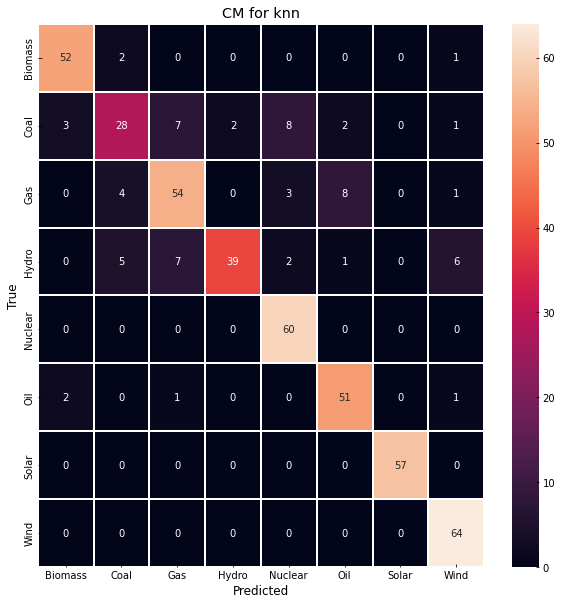

In [77]:
# For checking the confusion matrix using true and predicted ones:
CM= confusion_matrix(y_test, prediction)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(CM, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for knn")
plt.show()

Here, the KNN Model is giving accuracy of 86%

In [78]:
# For checking with another classification model:- DecisionTreeClasssfier:-
Dt=DecisionTreeClassifier()
Dt.fit(x_train,y_train)
pred_Dt=Dt.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_Dt))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_Dt))
print(classification_report(y_test,pred_Dt))

Accuracy Score:  0.8898305084745762
Confusion Matrix:  [[49  5  0  0  0  1  0  0]
 [ 1 36  2  7  3  2  0  0]
 [ 0  7 59  2  1  1  0  0]
 [ 0  4  4 52  0  0  0  0]
 [ 0  1  3  2 53  1  0  0]
 [ 0  2  2  0  0 51  0  0]
 [ 0  0  0  0  0  1 56  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        55
           1       0.65      0.71      0.68        51
           2       0.84      0.84      0.84        70
           3       0.83      0.87      0.85        60
           4       0.93      0.88      0.91        60
           5       0.89      0.93      0.91        55
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        64

    accuracy                           0.89       472
   macro avg       0.89      0.89      0.89       472
weighted avg       0.89      0.89      0.89       472



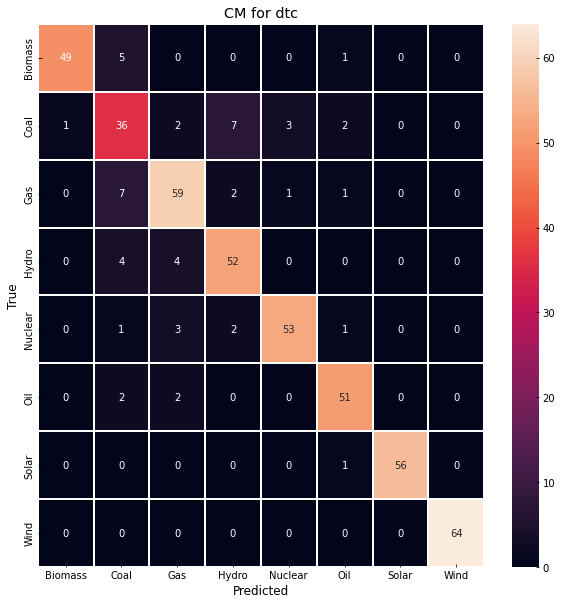

In [80]:
# For checking the confusion matrix using true and predicted ones:
CM1= confusion_matrix(y_test, pred_Dt)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(CM1, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for dtc")
plt.show()

Here, the DecisionTree is giving accuracy score of 89%

In [81]:
# For checking with another classification model:- SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_svc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy Score:  0.836864406779661
Confusion Matrix:  [[53  1  0  0  0  0  0  1]
 [ 2 34  3  3  5  1  0  3]
 [ 0  8 45  0  3 13  0  1]
 [ 0  6 10 33  2  3  0  6]
 [ 0  0  0  0 60  0  0  0]
 [ 1  1  0  0  0 49  0  4]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.68      0.67      0.67        51
           2       0.78      0.64      0.70        70
           3       0.92      0.55      0.69        60
           4       0.86      1.00      0.92        60
           5       0.74      0.89      0.81        55
           6       1.00      1.00      1.00        57
           7       0.81      1.00      0.90        64

    accuracy                           0.84       472
   macro avg       0.84      0.84      0.83       472
weighted avg       0.84      0.84      0.83       472



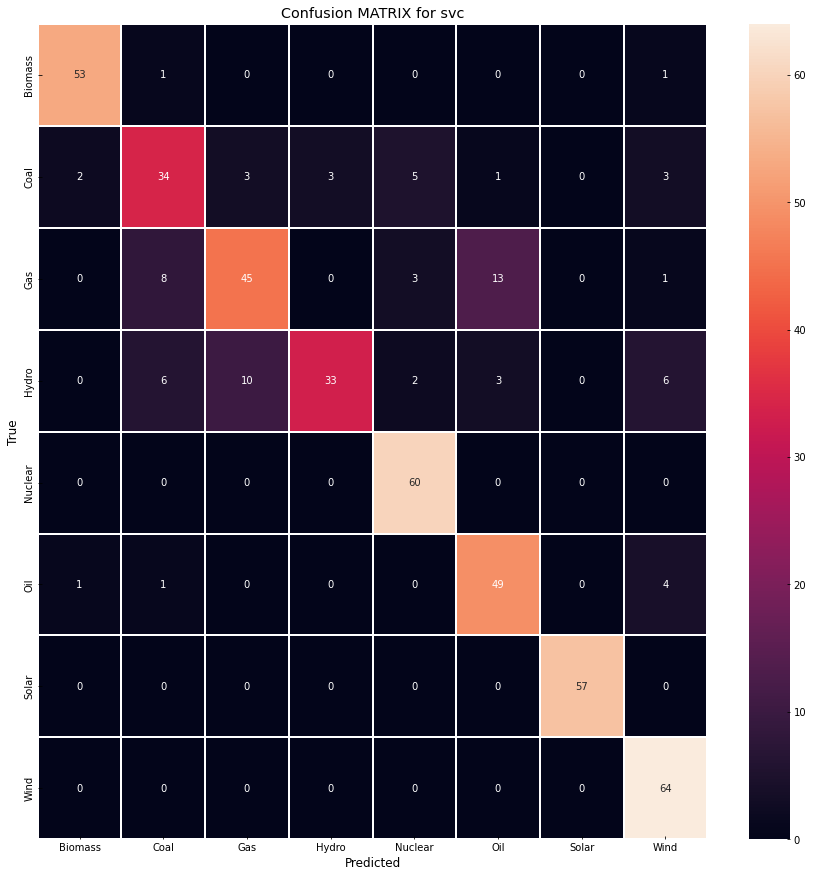

In [83]:
# For checking the confusion matrix using true and predicted ones:
CM2= confusion_matrix(y_test, pred_svc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(CM2, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion MATRIX for svc")
plt.show()

Here, it is giving accuarcy score of 83.6%

In [84]:
# For checking with another model: GradientBoostClassifier
Gbc=GradientBoostingClassifier()
Gbc.fit(x_train,y_train)
pred_Gbc=Gbc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_Gbc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_Gbc))
print(classification_report(y_test,pred_Gbc))

Accuracy Score:  0.9194915254237288
Confusion Matrix:  [[52  3  0  0  0  0  0  0]
 [ 4 38  3  3  3  0  0  0]
 [ 1  4 59  0  2  4  0  0]
 [ 0  3  5 52  0  0  0  0]
 [ 0  1  0  0 59  0  0  0]
 [ 0  1  0  1  0 53  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.76      0.75      0.75        51
           2       0.88      0.84      0.86        70
           3       0.93      0.87      0.90        60
           4       0.92      0.98      0.95        60
           5       0.93      0.96      0.95        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        64

    accuracy                           0.92       472
   macro avg       0.92      0.92      0.92       472
weighted avg       0.92      0.92      0.92       472



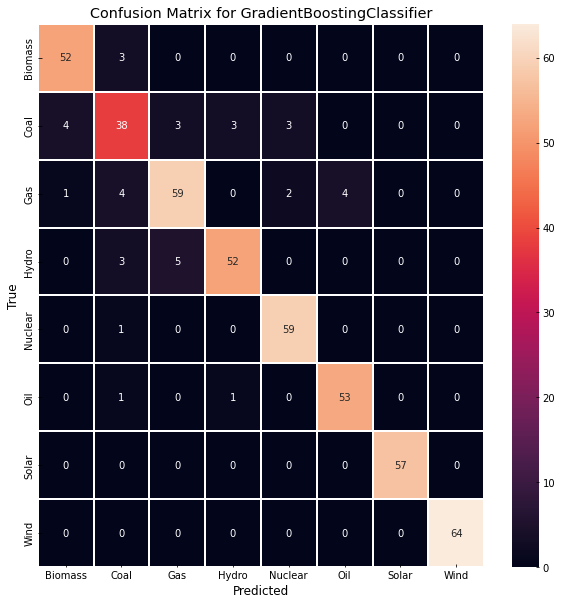

In [85]:
CM3= confusion_matrix(y_test, pred_Gbc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(CM3, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.show()

Here, it is giving accuracy score of 92%

In [86]:
# For checking with 5th and another model: RandomForestClassifier:-
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_RFC))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

Accuracy Score:  0.9216101694915254
Confusion Matrix:  [[54  0  0  0  0  0  0  1]
 [ 3 34  5  4  3  1  0  1]
 [ 0  5 58  0  2  5  0  0]
 [ 0  2  3 55  0  0  0  0]
 [ 0  1  0  0 59  0  0  0]
 [ 0  1  0  0  0 54  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.79      0.67      0.72        51
           2       0.88      0.83      0.85        70
           3       0.93      0.92      0.92        60
           4       0.92      0.98      0.95        60
           5       0.90      0.98      0.94        55
           6       1.00      1.00      1.00        57
           7       0.97      1.00      0.98        64

    accuracy                           0.92       472
   macro avg       0.92      0.92      0.92       472
weighted avg       0.92      0.92      0.92       472



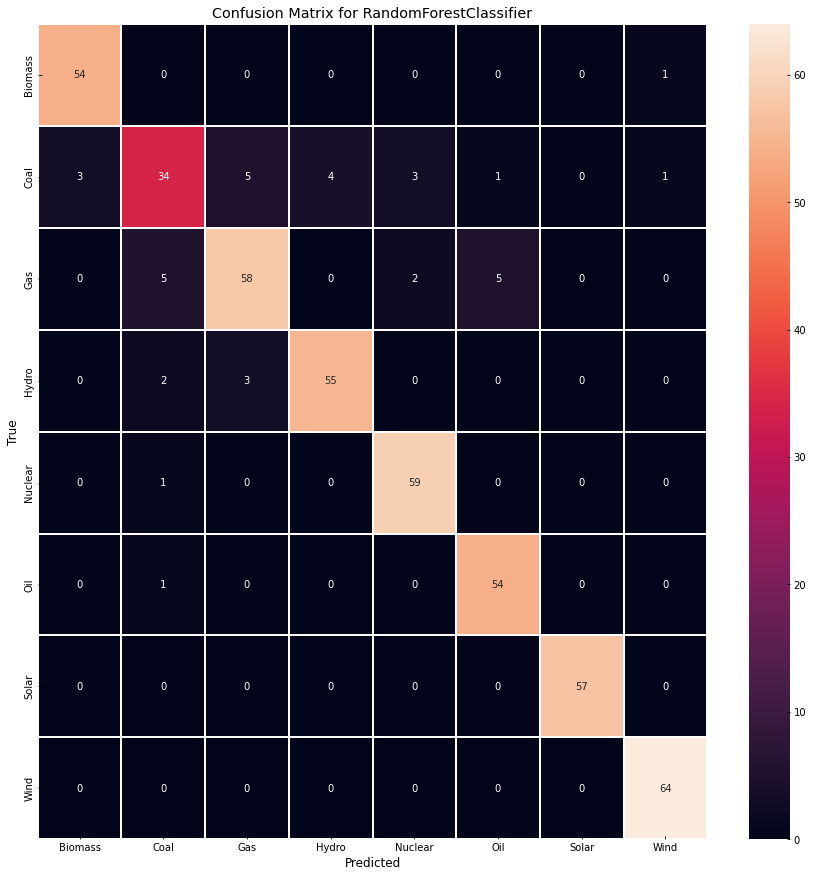

In [88]:
CM4= confusion_matrix(y_test, pred_RFC)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(CM4, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

So, as per the observations from above 5 models accurac y score predictions:-
Random Forest Classifier is giving best accuracy score 92.1% accuracy.

And also in Confusion Matrix the true values and predicted values are seen.

# CROSS VALIDATION PHASE:-

In [89]:
# Importing required librarIES
from sklearn.model_selection import cross_val_score

In [91]:
#For checking KNN Cv score
print(cross_val_score(K,x,y,cv=5).mean())

0.8755238375928032


In [92]:
#  For checking Decision Tree Cv score
print(cross_val_score(Dt,x,y,cv=5).mean())

0.9009473285335355


In [93]:
#  For checking SVC Cv score
print(cross_val_score(svc,x,y,cv=5).mean())

0.8442718201338891


In [95]:
#  For checking GBC Cv score
print(cross_val_score(Gbc,x,y,cv=5).mean())

0.9173789173789174


In [96]:
#  For checking RFC Cv score
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9332617573996884


In this, as per the observations Knn performs well in cv score and Accuracy parameters.

# HYPER PARAMETER TUNING USING GRID SEARCH CV:-

In [97]:
# For importing required libraries:-
from sklearn.model_selection import GridSearchCV

In [102]:
# Defining the parameters for KNN classifier:-
parameters = {'n_neighbors':[1,2,3,4,5,6],    
             'weights':['uniform','distance'],
             'leaf_size':[10,100,1000],
             'algorithm':['auto','ball_tree','kd_tree','brute']}
Gcv=GridSearchCV(knn(),parameters,cv=5)

In [103]:
Gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100, 1000],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [104]:
Gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [106]:
Model1=knn(algorithm='auto',leaf_size=10,n_neighbors=1,weights='uniform')
Model1.fit(x_train,y_train)
pred=Model1.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

93.22033898305084


Here, after tuning the parameters the Knn score increased to 93.2% which is almost equal to even RandomForest.

# ROC/AUC CURVE:-

In [107]:
# For plotting ROC AUC curve:
# For importing neccessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

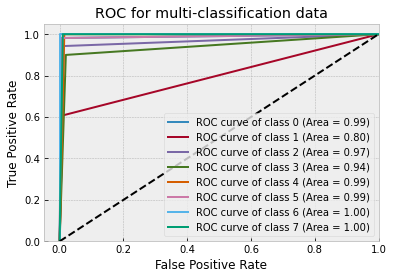

In [114]:
# For checking ROC/AUC distributions and the FPR:-
Classifier = OneVsRestClassifier(Model1)
y_sco = Classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()

for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of multi-classification data')
plt.legend(loc="lower right")
plt.show()

Here, the best model is KNN with the RUC/AUC Curves of all models.

# Saving the Model No. 1:-

In [118]:
# For saving the model 
# For importing required libraries

import pickle
Name='PrimaryFuel'
pickle.dump(Model1,open(Name,'wb'))

# Loaded Model:-

In [121]:
Model1=pickle.load(open("PrimaryFuel", 'rb'))
Model1.predict(x_test)

array([3, 4, 5, 5, 6, 7, 0, 3, 5, 4, 3, 3, 2, 2, 0, 1, 7, 4, 6, 2, 3, 6,
       7, 1, 7, 6, 2, 7, 7, 2, 6, 5, 6, 6, 6, 7, 5, 2, 3, 6, 1, 5, 2, 7,
       5, 5, 0, 3, 4, 1, 0, 2, 6, 6, 6, 3, 0, 0, 4, 6, 7, 7, 0, 7, 3, 3,
       0, 0, 0, 0, 4, 0, 0, 4, 7, 3, 6, 0, 2, 7, 3, 7, 0, 7, 2, 5, 4, 5,
       4, 6, 0, 2, 5, 4, 5, 3, 3, 2, 4, 5, 5, 4, 4, 3, 2, 6, 7, 7, 0, 6,
       5, 5, 7, 0, 4, 2, 2, 2, 5, 3, 7, 6, 4, 0, 2, 3, 6, 0, 2, 0, 3, 0,
       2, 7, 4, 2, 4, 6, 2, 7, 5, 2, 2, 4, 7, 2, 7, 7, 6, 2, 7, 4, 6, 4,
       3, 6, 4, 7, 0, 1, 6, 7, 0, 5, 3, 3, 0, 1, 7, 5, 4, 4, 6, 5, 2, 2,
       4, 6, 0, 2, 6, 5, 4, 4, 1, 1, 4, 4, 6, 0, 2, 7, 3, 6, 5, 2, 7, 7,
       5, 3, 6, 4, 2, 1, 5, 5, 2, 3, 1, 6, 5, 1, 4, 0, 2, 2, 3, 0, 6, 6,
       7, 6, 6, 5, 5, 0, 0, 7, 4, 3, 1, 2, 7, 3, 2, 5, 0, 7, 5, 7, 5, 7,
       1, 3, 3, 0, 6, 3, 3, 3, 4, 7, 2, 5, 4, 2, 4, 3, 0, 4, 3, 6, 7, 2,
       1, 4, 7, 2, 6, 7, 1, 5, 5, 6, 7, 2, 0, 4, 4, 4, 0, 5, 4, 2, 3, 3,
       2, 3, 3, 5, 0, 0, 0, 3, 2, 5, 2, 2, 1, 5, 2,

In [122]:
pd.DataFrame([Model1.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,462,463,464,465,466,467,468,469,470,471
Predicted,3,4,5,5,6,7,0,3,5,4,...,1,6,7,4,4,2,0,3,2,3
Actual,3,1,5,5,6,7,0,3,5,4,...,1,6,7,4,4,2,0,3,2,3


In [123]:
# For checking VIF:-
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.622966,capacity_mw
1,1.193670,latitude
2,1.237675,longitude
3,NaN,other_fuel1
4,1.229305,source
5,1.540165,geolocation_source
6,5.741899,generation_gwh_2014
7,10.815532,generation_gwh_2015
8,16.268076,generation_gwh_2016
9,8.218586,generation_gwh_2017


# Model No. 2:- Capacity_mw

In [75]:
# Lets assign values to x and y
X1=data1.drop("capacity_mw",axis=1)
Y1=data1["capacity_mw"]

In [76]:
X1

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,since_years
0,28.1839,-0.936517,6,2,1.618164,-2.288833,0.327178,0.352379,0.354656,0.350414,0.357834,-1.198750
1,24.7663,-0.520429,1,2,2.092390,0.403076,0.327178,0.352379,0.354656,0.350414,0.357834,0.191304
2,21.9038,-2.355561,7,2,-0.467489,0.403076,0.327178,0.352379,0.354656,0.350414,0.357834,0.191304
3,23.8712,2.450864,2,2,-0.399180,0.403076,-1.040492,-0.730514,-0.679065,-0.893042,-0.912405,-0.436833
4,21.9603,1.244648,1,2,-0.399180,0.403076,0.663763,1.883761,1.909105,1.521297,2.030682,-1.753478
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.206532,1,2,-0.399180,0.403076,0.327178,-2.098113,-1.412418,-0.710954,-0.854765,-1.921391
903,12.8932,0.396270,6,2,1.233745,-2.487253,0.327178,0.352379,0.354656,0.350414,0.357834,0.191304
904,15.2758,-0.247710,7,2,-0.467489,0.403076,0.327178,0.352379,0.354656,0.350414,0.357834,0.191304
905,24.3500,-0.777726,1,2,0.919710,0.403076,0.327178,0.352379,0.354656,0.350414,0.357834,0.191304


# Best Random State:-

In [73]:
# For finding the Best Random State:-

from sklearn.ensemble import RandomForestRegressor
MaxAccu=0
MaxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best accuracy is ",MaxAccu," on Random_state ",MaxRS)

Best accuracy is  0.9540897637577431  on Random_state  50


Here, the accuracy score is 95.4% with random state 50

In [77]:
# For assigning the best random state values to train and test:-
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=.30, random_state=85)

In [78]:
# For Importing required libraries for Regression algorithms:-
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [79]:
# For checking with KNeighbors Regressor:-
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.7084848082528092
mean_squared_error: 0.2773639014241046
mean_absolute_error: 0.3782193729520337
root_mean_squared_error: 0.5266534927484148


Here, the kNN is giving R2 score of 71%

In [81]:
# For checking with another method GradientBoosting Regressor:
Gb=GradientBoostingRegressor()
Gb.fit(x_train,y_train)
pred=Gb.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.8383693665303245
mean_squared_error: 0.15378444883132125
mean_absolute_error: 0.2976121931727471
root_mean_squared_error: 0.3921536036189407


In [82]:
# For checking with another method RandomForestRegressor:-
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.8315341208337449
mean_squared_error: 0.16028788490349605
mean_absolute_error: 0.289342588586581
root_mean_squared_error: 0.4003596944042895


Here, the RandomForest is giving 83% R2 score.

In [84]:
# For checkimg with another method:- DecisionTree Regressor:-
Dtc=DecisionTreeRegressor()
Dtc.fit(x_train,y_train)
pred=Dtc.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.6710238546778928
mean_squared_error: 0.3130063534429236
mean_absolute_error: 0.40082943589766196
root_mean_squared_error: 0.5594697073505621


# Cross Validation Phase:-

In [87]:
# for checking cv score of KNN
print(cross_val_score(knn,X1,Y1,cv=5).mean())

0.6282270017310594


In [89]:
# for checking cv score of RF
print(cross_val_score(RF,X1,Y1,cv=5).mean())

0.7879015627221149


In [91]:
# for checking cv score of GradientBoost:-
print(cross_val_score(Gb,X1,Y1,cv=5).mean())

0.795642552334592


In [92]:
# for checking cv score of DecisionTreeRegressor:-
print(cross_val_score(Dtc,X1,Y1,cv=5).mean())

0.6446788341883533


Here, the drop in score is less in RandomForestRegressor, so it is the best model and lets check after Hyperparameter tuning:-

# Hyper Parameter Tuning:-

In [97]:
# For importing required libraries using GrIdSearchCV:-
from sklearn.model_selection import GridSearchCV

In [100]:
# For selecting parameter for RandomForest:-
parameters = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [ ]:
Grid=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
Grid.fit(x_train,y_train)

In [103]:
Grid.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [105]:
Model2=RandomForestRegressor(bootstrap=False,criterion='mse',max_depth=8,max_features='log2',n_estimators=200)
Model2.fit(x_train,y_train)
pred=Model2.predict(x_test)
print('r2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2_Score: 84.11668129204848
mean_squared_error: 0.15112280145661935
mean_absolute_error: 0.2874609272199626
RMSE value: 0.38874516261507275


After tuning the model using GridSearchCV,the R2 score is 84%.

# Saving the Model 2:-

In [106]:
# For saving the model 
# For importing required libraries

import pickle
Name='Capacity_mw'
pickle.dump(Model2,open(Name,'wb'))

#  Loading Model 2:-

In [108]:
# For loading the saved model:-
model2=pickle.load(open("Capacity_mw", 'rb'))
model2.predict(x_test)

array([-1.08930499,  0.3158793 ,  0.59620936, -0.33574661, -0.43355426,
       -0.80672212,  1.26483498, -0.97296716,  0.31955924, -0.59579254,
       -0.46376095,  1.58336819, -0.07114093,  0.31647661,  0.04627186,
       -0.02167884,  0.27146683, -0.56643317, -0.7012834 , -0.38609549,
        0.72570512,  0.22287505,  0.69055863,  1.40704753,  0.26354153,
       -0.31785967,  0.2227443 , -0.14356492,  0.70555766, -0.95354615,
       -0.30097472,  0.30738632,  0.57249046, -0.88792001,  0.12777443,
       -1.0517777 , -0.58287911, -1.00847008,  0.22110724, -0.50200642,
       -1.01621637, -0.30280611,  0.93790208,  0.92517408, -1.52683366,
       -0.22448755, -0.58391089,  0.67781766,  1.56289511, -1.17544762,
       -0.2596851 , -0.58477266, -0.5248938 , -0.30130404,  0.47381373,
        1.64088873, -0.73669745, -1.26113304, -0.20951062,  0.81666241,
       -1.34655567,  0.08384295,  1.52694285,  0.96768265, -0.54902421,
       -0.1731225 ,  1.69371602,  1.571654  , -0.29082615, -0.20

In [109]:
pd.DataFrame([Model2.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
Predicted,-1.089305,0.315879,0.596209,-0.335747,-0.433554,-0.806722,1.264835,-0.972967,0.319559,-0.595793,...,-0.563528,-0.637617,1.131914,1.025925,0.020563,0.824778,-1.268298,0.076215,0.865401,0.416272
Actual,-1.014346,0.997643,1.148289,-0.351409,-0.149424,-0.155773,1.414756,-1.068423,-0.391143,-1.271843,...,-0.520998,-0.553387,1.097975,1.097975,0.308089,1.097975,-1.014346,-0.149424,0.791961,-0.216579


Thanks